#**Implementation Of Naive_Bayes Algorithm**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Dataset From sklearn.datasets**

In [48]:
from sklearn.datasets import load_iris
d = load_iris()

#**Reform Data into Dataframe**

In [49]:
df = pd.DataFrame(d.data,columns=d.feature_names)

In [50]:
d.keys #keys

<function Bunch.keys>

In [51]:
print(d['DESCR']) #Description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [73]:
d.data[0] #data of 0th row

array([5.1, 3.5, 1.4, 0.2])

In [74]:
d.target #Target Column

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
np.unique(d.target)

array([0, 1, 2])

In [55]:
len(d.target)

150

#**Add target column as output in dataset**


In [56]:
df['output'] = d.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


#**Splitting Data**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop(columns='output')
X[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [59]:
y = df.output
y[:2]

0    0
1    0
Name: output, dtype: int64

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

#**Train Data in Bernoulli Naive-bayes**

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [62]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

34.166666666666664

#**Train Data in Multinomial Naive-bayes**

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

88.33333333333333

#**Train Data in Gaussian Naive-bayes**

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.83333333333334

#**Go with GaussianNB because Have a Highest Score**

#**Testing Phase**

In [67]:
y_pred = gnb.predict(X_test)
y_pred[:5]

array([2, 2, 1, 2, 0])

In [68]:
y_test[:5]

143    2
126    2
91     1
77     1
43     0
Name: output, dtype: int64

#**Performance Metrics**

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]])

Text(50.722222222222214, 0.5, 'Actual Output')

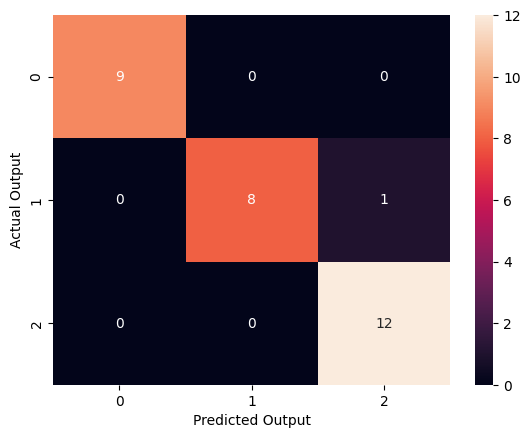

In [71]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

